## DMP Final Project
Feature engineering and modelling

### Set-up and Load cleaned Data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import itertools

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# model tools
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, GammaRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [4]:
# Load cleaned dataset
df_cleaned = pd.read_csv('cleaned_data.csv')
df_cleaned.head()


,statusText,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,isZillowOwned,sgapt,has3DModel,hasVideo,hasAdditionalAttributions,homeType,priceReductionStr,lotAreaRaw,priceReductionRatio,lat,long
0,House for sale,565000.0,"6648 Logan Ave, Fontana, CA 92336",6648 Logan Ave,Fontana,CA,92336.0,4,3,2362.0,False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,6620.0,0.0,34.133167,-117.469734
1,House for sale,520000.0,"9508 Marcona Ave, Fontana, CA 92335",9508 Marcona Ave,Fontana,CA,92335.0,4,2,1362.0,False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8663.0,0.0,34.081030,-117.468796
2,House for sale,799900.0,"17625 Hawthorne Ave, Fontana, CA 92335",17625 Hawthorne Ave,Fontana,CA,92335.0,5,3,2683.0,False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,16091.0,0.0,34.081074,-117.419740
3,House for sale,519999.0,"16562 Iris Dr, Fontana, CA 92335",16562 Iris Dr,Fontana,CA,92335.0,3,2,1712.0,False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8700.0,0.0,34.072838,-117.442580
4,House for sale,580000.0,"9577 Sultana Ave, Fontana, CA 92335",9577 Sultana Ave,Fontana,CA,92335.0,4,2,1564.0,False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,7300.0,0.0,34.079777,-117.469215


In [5]:
df_cleaned.shape


(100770, 21)

In [6]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100770 entries, 0 to 100769
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   statusText                 100770 non-null  object 
 1   unformattedPrice           100770 non-null  float64
 2   address                    100770 non-null  object 
 3   addressStreet              100770 non-null  object 
 4   addressCity                100770 non-null  object 
 5   addressState               100770 non-null  object 
 6   addressZipcode             100770 non-null  float64
 7   beds                       100770 non-null  int64  
 8   baths                      100770 non-null  int64  
 9   area                       100770 non-null  float64
 10  isZillowOwned              100770 non-null  bool   
 11  sgapt                      100770 non-null  object 
 12  has3DModel                 100770 non-null  bool   
 13  hasVideo                   10

In [7]:
df_cleaned.columns

Index(['statusText', 'unformattedPrice', 'address', 'addressStreet',
       'addressCity', 'addressState', 'addressZipcode', 'beds', 'baths',
       'area', 'isZillowOwned', 'sgapt', 'has3DModel', 'hasVideo',
       'hasAdditionalAttributions', 'homeType', 'priceReductionStr',
       'lotAreaRaw', 'priceReductionRatio', 'lat', 'long'],
      dtype='object')

In [8]:
df_cleaned.describe()

,unformattedPrice,addressZipcode,beds,baths,area,priceReductionStr,lotAreaRaw,priceReductionRatio,lat,long
count,1.007700e+05,100770.000000,100770.000000,100770.000000,100770.000000,1.007700e+05,1.007700e+05,100770.000000,100770.000000,100770.000000
mean,4.164648e+05,61210.905964,3.052317,2.221127,1759.469743,5.092874e+04,6.629167e+05,0.008123,35.391504,-95.733941
std,2.790050e+05,26258.870953,1.068867,0.917520,682.745215,5.725900e+06,5.708274e+07,0.036580,5.482519,14.818228
min,1.100000e+03,1085.000000,0.000000,0.000000,105.000000,0.000000e+00,-1.089000e+04,0.000000,21.260668,-157.911000
25%,2.150000e+05,35802.000000,3.000000,2.000000,1271.000000,0.000000e+00,8.710000e+02,0.000000,30.431728,-106.601642
50%,3.595000e+05,70805.000000,3.000000,2.000000,1737.000000,0.000000e+00,5.711358e+03,0.000000,34.184885,-95.134740
75%,5.590000e+05,82637.000000,4.000000,3.000000,2116.000000,0.000000e+00,9.801000e+03,0.000000,39.988139,-84.229743
max,1.370000e+06,99587.000000,9.000000,9.000000,3877.000000,9.580410e+08,1.181565e+10,0.999000,61.443142,-70.998330


array([[<AxesSubplot: title={'center': 'unformattedPrice'}>,
        <AxesSubplot: title={'center': 'addressZipcode'}>,
        <AxesSubplot: title={'center': 'beds'}>],
       [<AxesSubplot: title={'center': 'baths'}>,
        <AxesSubplot: title={'center': 'area'}>,
        <AxesSubplot: title={'center': 'priceReductionStr'}>],
       [<AxesSubplot: title={'center': 'lotAreaRaw'}>,
        <AxesSubplot: title={'center': 'priceReductionRatio'}>,
        <AxesSubplot: title={'center': 'lat'}>],
       [<AxesSubplot: title={'center': 'long'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

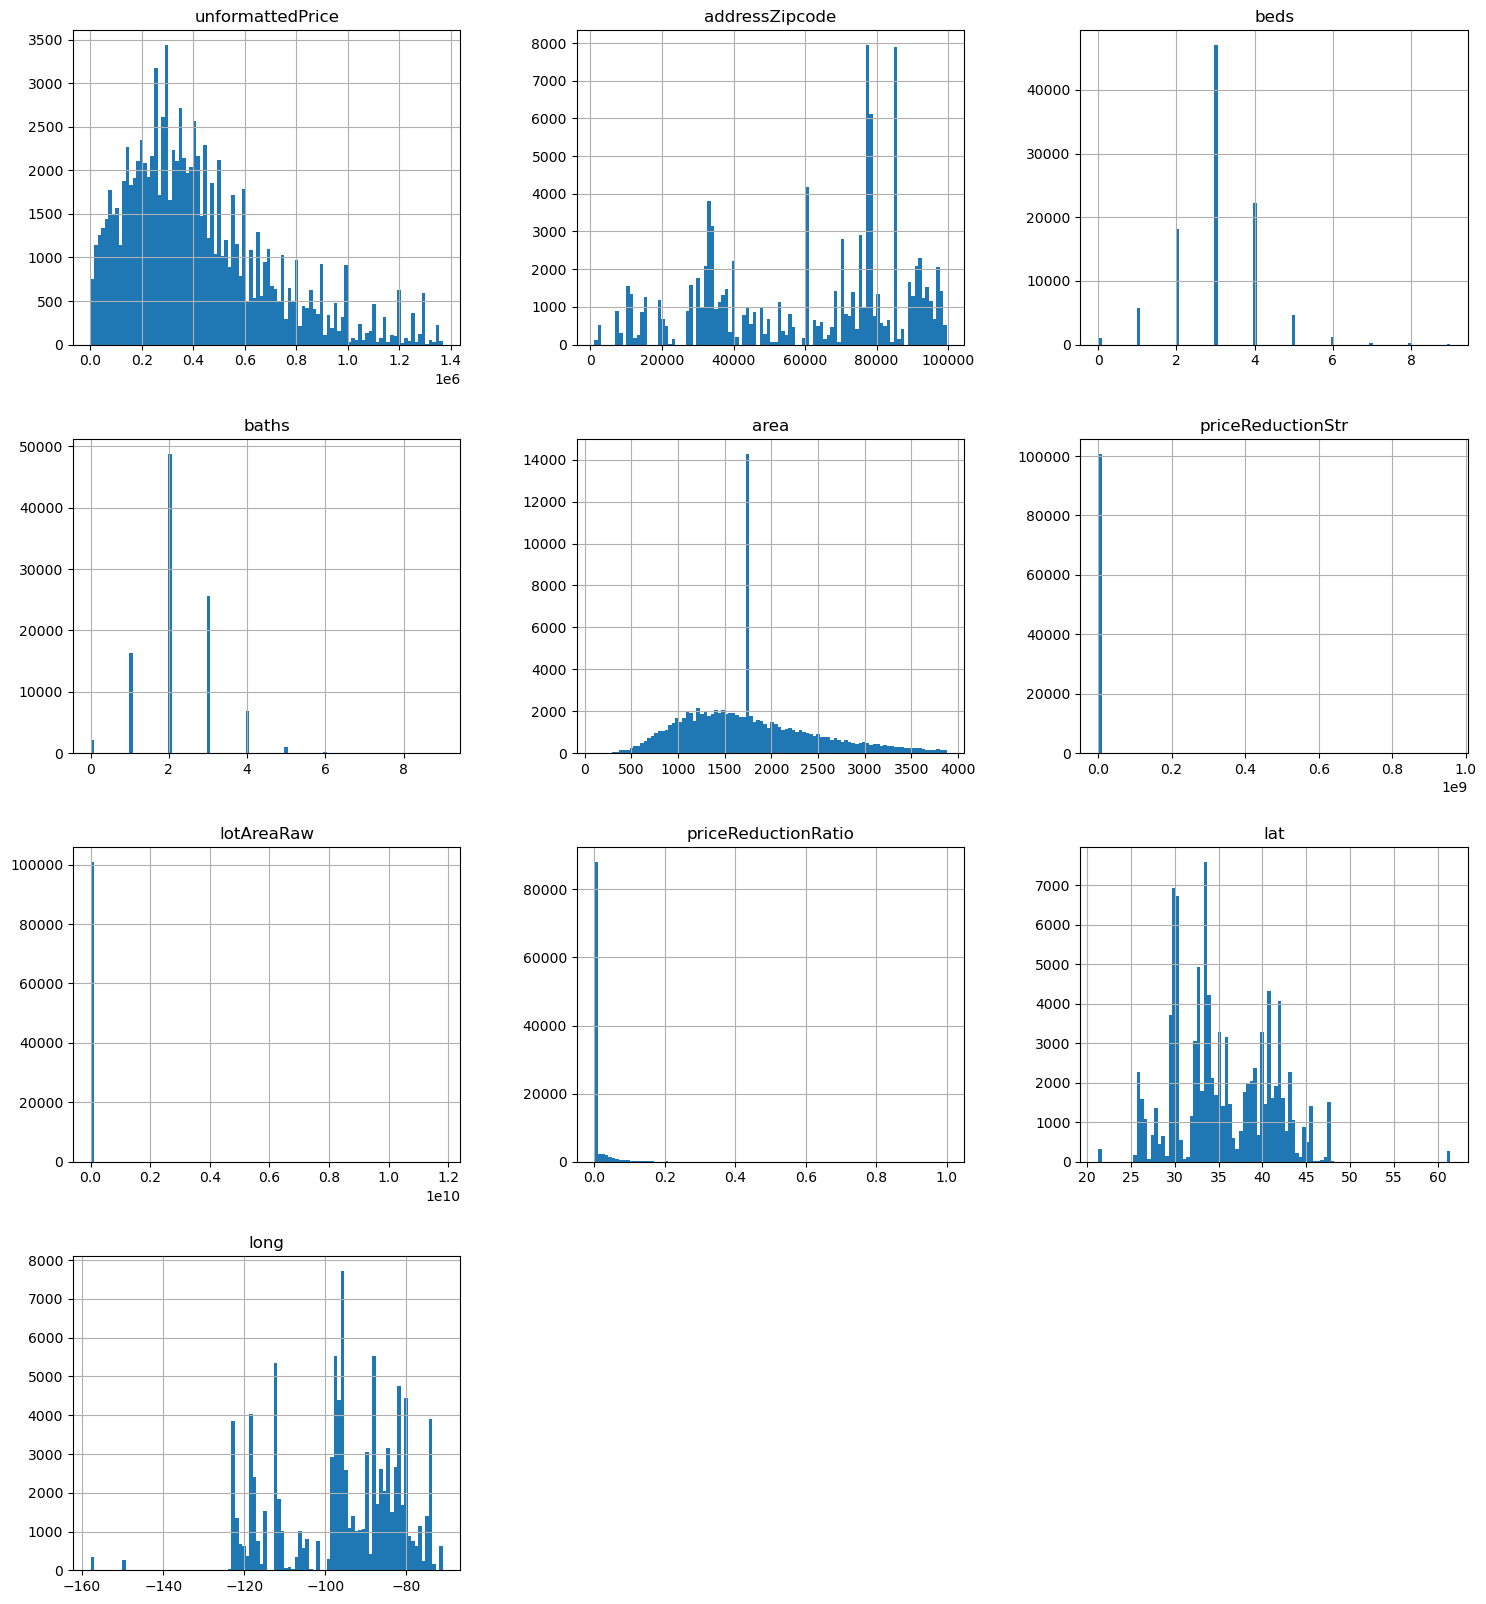

In [9]:
df_cleaned.hist(figsize=(18, 20), bins=100)

### Feature Engineering

#### Correlations/Multicollinearity

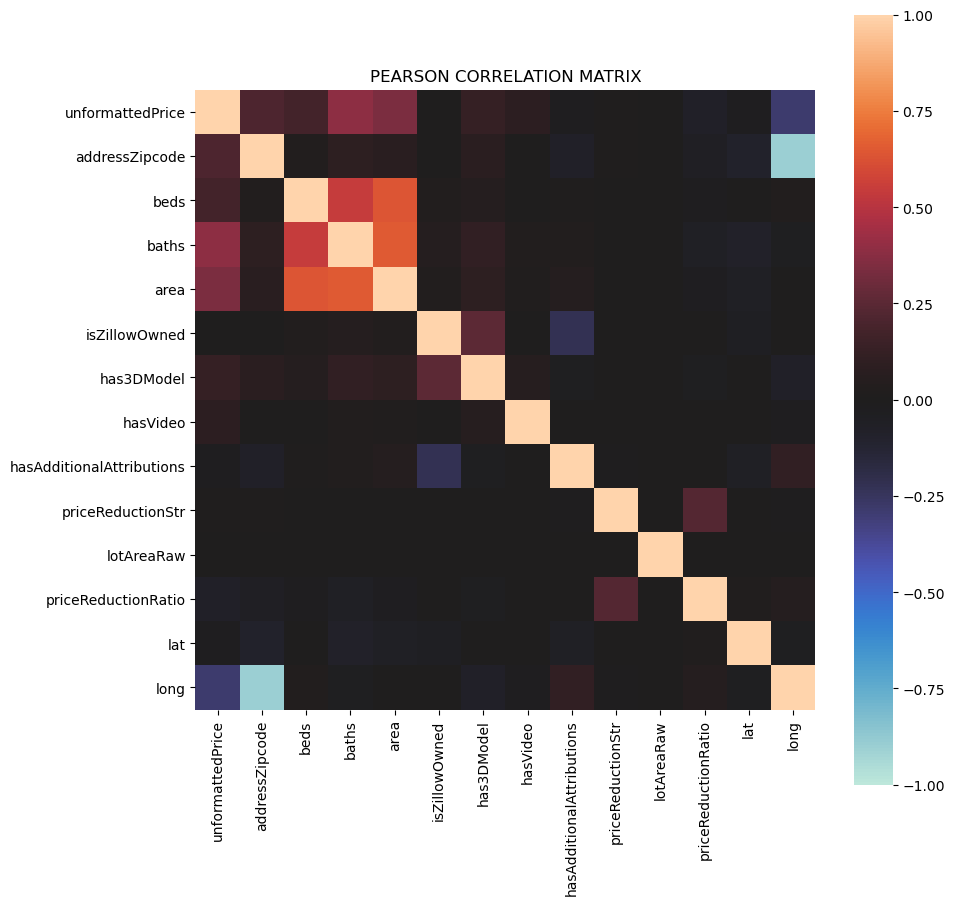

In [10]:
# look for multicollinearity of features
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_cleaned.corr(), center=0, vmin=-1, vmax=1,  square=True)

# title
plt.title('PEARSON CORRELATION MATRIX', fontsize=12)
plt.show()

In [11]:
df_cleaned.corr()

,unformattedPrice,addressZipcode,beds,baths,area,isZillowOwned,has3DModel,hasVideo,hasAdditionalAttributions,priceReductionStr,lotAreaRaw,priceReductionRatio,lat,long
unformattedPrice,1.000000,0.206410,0.175343,0.384378,0.339439,-0.001262,0.117607,0.085808,-0.020201,0.008742,0.003494,-0.076799,-0.020912,-0.285357
addressZipcode,0.206410,1.000000,0.025035,0.088595,0.069818,-0.001578,0.076280,0.006602,-0.074088,0.009356,-0.006096,-0.048690,-0.087623,-0.900607
beds,0.175343,0.025035,1.000000,0.544825,0.638174,0.028033,0.042337,-0.004691,0.014741,-0.006171,-0.000648,-0.015660,-0.007383,0.027385
baths,0.384378,0.088595,0.544825,1.000000,0.653082,0.042896,0.101910,0.027531,0.026696,-0.003181,0.000483,-0.060165,-0.084020,-0.035003
area,0.339439,0.069818,0.638174,0.653082,1.000000,0.030313,0.093699,0.017045,0.046603,-0.007555,-0.000233,-0.026058,-0.062331,0.007694
isZillowOwned,-0.001262,-0.001578,0.028033,0.042896,0.030313,1.000000,0.257368,-0.001793,-0.221659,-0.000816,-0.001140,0.004221,-0.040890,-0.006595
has3DModel,0.117607,0.076280,0.042337,0.101910,0.093699,0.257368,1.000000,0.047621,-0.034208,-0.002656,-0.002149,-0.033465,0.000252,-0.076146
hasVideo,0.085808,0.006602,-0.004691,0.027531,0.017045,-0.001793,0.047621,1.000000,-0.002122,0.006899,-0.000345,-0.001148,0.000192,-0.016437
hasAdditionalAttributions,-0.020201,-0.074088,0.014741,0.026696,0.046603,-0.221659,-0.034208,-0.002122,1.000000,-0.011067,0.003103,-0.006184,-0.062171,0.107391
priceReductionStr,0.008742,0.009356,-0.006171,-0.003181,-0.007555,-0.000816,-0.002656,0.006899,-0.011067,1.000000,-0.000083,0.228768,-0.000731,-0.012482


In [12]:
# Get list of highly correlated features
df_correlations = df_cleaned.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation and below 90% correlation (engineered features will correlate with each other above 95%)
df_correlations[(df_correlations.correlation>.75) & (df_correlations.correlation<.95)]

,level_0,level_1,correlation
pairs,,,
"(addressZipcode, long)",addressZipcode,long,0.900607
"(long, addressZipcode)",long,addressZipcode,0.900607


We can see the columns zipcode and longitude are highly correlated. We'll only keep one of them in model fitting.

#### Examine Target Variable

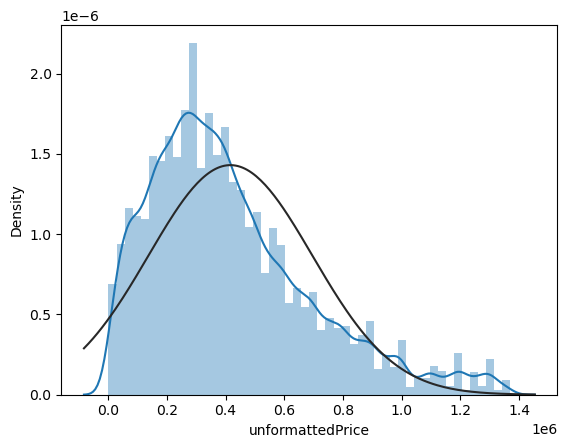

<Figure size 640x480 with 0 Axes>

In [13]:
# Target Variable
sns.distplot(df_cleaned['unformattedPrice'], fit=norm)
fig = plt.figure()

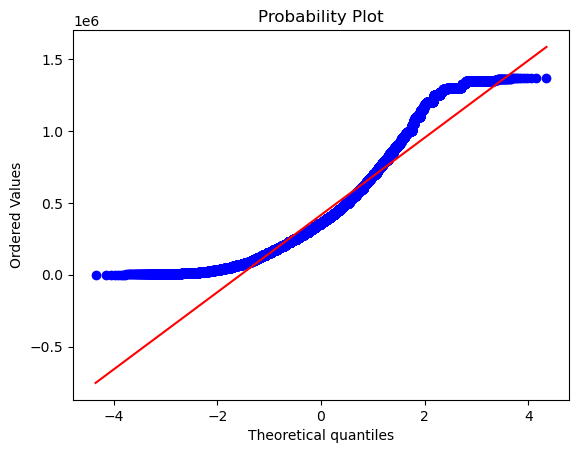

In [14]:
res = stats.probplot(df_cleaned['unformattedPrice'], plot=plt)

The target variable UnformattedPrice is a little rightly skewed.

In [15]:
def process_df(df):

    # Select specified columns
    cols = ['unformattedPrice', 'addressZipcode', 'beds', 'baths',
            'area', 'isZillowOwned', 'sgapt', 'has3DModel', 'hasVideo',
            'hasAdditionalAttributions', 'homeType', 'priceReductionStr',
            'lotAreaRaw', 'priceReductionRatio']
    df = df[cols]

    # Encode binary variables
    df['isZillowOwned'] = df['isZillowOwned'].apply(lambda x: 1 if x == True else 0)
    df['has3DModel'] = df['has3DModel'].apply(lambda x: 1 if x == True else 0)
    df['hasVideo'] = df['hasVideo'].apply(lambda x: 1 if x == True else 0)
    df['hasAdditionalAttributions'] = df['hasAdditionalAttributions'].apply(lambda x: 1 if x == True else 0)

    # One-hot encoding
    df = pd.get_dummies(df, columns=['sgapt', 'homeType'])

    return df

In [16]:
df_feat = process_df(df_cleaned)
df_feat.head(20)

,unformattedPrice,addressZipcode,beds,baths,area,isZillowOwned,has3DModel,hasVideo,hasAdditionalAttributions,priceReductionStr,lotAreaRaw,priceReductionRatio,sgapt_Coming Soon,sgapt_For Sale (Broker),sgapt_For Sale By Owner,sgapt_For Sale by Agent,sgapt_Foreclosure,sgapt_New Construction,sgapt_RecentChange,sgapt_Unknown Listed By,homeType_APARTMENT,homeType_CONDO,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,565000.0,92336.0,4,3,2362.0,0,0,0,1,0.0,6620.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,520000.0,92335.0,4,2,1362.0,0,0,0,1,0.0,8663.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,799900.0,92335.0,5,3,2683.0,0,0,0,1,0.0,16091.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,519999.0,92335.0,3,2,1712.0,0,0,0,1,0.0,8700.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,580000.0,92335.0,4,2,1564.0,0,0,0,1,0.0,7300.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,599000.0,92335.0,3,3,1832.0,0,0,0,1,0.0,7232.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6,374990.0,92335.0,2,3,1030.0,0,1,0,1,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7,575000.0,92337.0,4,3,1806.0,0,0,0,1,0.0,6300.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,699000.0,92336.0,3,3,2230.0,0,1,0,1,0.0,8550.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9,450000.0,92336.0,2,1,832.0,0,0,0,1,0.0,3600.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
df_feat.shape

(100770, 27)

In [18]:
df_feat.describe()

,unformattedPrice,addressZipcode,beds,baths,area,isZillowOwned,has3DModel,hasVideo,hasAdditionalAttributions,priceReductionStr,lotAreaRaw,priceReductionRatio,sgapt_Coming Soon,sgapt_For Sale (Broker),sgapt_For Sale By Owner,sgapt_For Sale by Agent,sgapt_Foreclosure,sgapt_New Construction,sgapt_RecentChange,sgapt_Unknown Listed By,homeType_APARTMENT,homeType_CONDO,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
count,1.007700e+05,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,1.007700e+05,1.007700e+05,100770.000000,100770.000000,100770.000000,100770.000000,100770.00000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000,100770.000000
mean,4.164648e+05,61210.905964,3.052317,2.221127,1759.469743,0.009894,0.088439,0.016314,0.830991,5.092874e+04,6.629167e+05,0.008123,0.011015,0.851037,0.000466,0.00004,0.006947,0.129533,0.000268,0.000695,0.002620,0.160415,0.089421,0.016017,0.045668,0.623072,0.062787
std,2.790050e+05,26258.870953,1.068867,0.917520,682.745215,0.098975,0.283934,0.126682,0.374761,5.725900e+06,5.708274e+07,0.036580,0.104374,0.356054,0.021592,0.00630,0.083056,0.335790,0.016367,0.026347,0.051117,0.366992,0.285353,0.125540,0.208766,0.484619,0.242580
min,1.100000e+03,1085.000000,0.000000,0.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.089000e+04,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.150000e+05,35802.000000,3.000000,2.000000,1271.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,8.710000e+02,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.595000e+05,70805.000000,3.000000,2.000000,1737.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,5.711358e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.590000e+05,82637.000000,4.000000,3.000000,2116.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,9.801000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.370000e+06,99587.000000,9.000000,9.000000,3877.000000,1.000000,1.000000,1.000000,1.000000,9.580410e+08,1.181565e+10,0.999000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Exploration

In [19]:
# Create holdout set
randomstate = 0

y = df_feat['unformattedPrice']
X = df_feat.drop('unformattedPrice', axis=1,)

# creating our train/validation sets and our test sets
train_data, holdout, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)

In [20]:
y

0          565000.0
1          520000.0
2          799900.0
3          519999.0
4          580000.0
            ...    
100765     215000.0
100766     250000.0
100767     700000.0
100768    1000000.0
100769    1100000.0
Name: unformattedPrice, Length: 100770, dtype: float64

In [21]:
X

,addressZipcode,beds,baths,area,isZillowOwned,has3DModel,hasVideo,hasAdditionalAttributions,priceReductionStr,lotAreaRaw,priceReductionRatio,sgapt_Coming Soon,sgapt_For Sale (Broker),sgapt_For Sale By Owner,sgapt_For Sale by Agent,sgapt_Foreclosure,sgapt_New Construction,sgapt_RecentChange,sgapt_Unknown Listed By,homeType_APARTMENT,homeType_CONDO,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,92336.0,4,3,2362.0,0,0,0,1,0.0,6620.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,92335.0,4,2,1362.0,0,0,0,1,0.0,8663.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,92335.0,5,3,2683.0,0,0,0,1,0.0,16091.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,92335.0,3,2,1712.0,0,0,0,1,0.0,8700.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,92335.0,4,2,1564.0,0,0,0,1,0.0,7300.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100765,7108.0,3,2,1737.0,0,0,0,1,0.0,4791.6,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
100766,7108.0,3,2,1737.0,0,0,0,1,0.0,6969.6,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
100767,7103.0,3,2,1737.0,0,0,0,1,0.0,9147.6,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
100768,7106.0,3,2,1737.0,0,0,0,1,0.0,16988.4,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
train_data.head()

,addressZipcode,beds,baths,area,isZillowOwned,has3DModel,hasVideo,hasAdditionalAttributions,priceReductionStr,lotAreaRaw,priceReductionRatio,sgapt_Coming Soon,sgapt_For Sale (Broker),sgapt_For Sale By Owner,sgapt_For Sale by Agent,sgapt_Foreclosure,sgapt_New Construction,sgapt_RecentChange,sgapt_Unknown Listed By,homeType_APARTMENT,homeType_CONDO,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
843,43204.0,3,1,1221.0,0,0,0,1,0.0,203425.2,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
98429,85745.0,3,2,1737.0,0,0,0,1,0.0,144619.2,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
33702,79423.0,4,2,1884.0,0,0,0,1,0.0,6844.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
61593,14609.0,3,1,1938.0,0,0,0,1,0.0,3920.4,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
38082,85745.0,3,2,1455.0,0,0,0,1,0.0,7405.2,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
holdout.shape

(20154, 26)

In [24]:
# reset indices to prevent any index mismatches
train_data.reset_index(inplace=True)
train_data.drop('index', axis=1, inplace=True)

holdout.reset_index(inplace=True)
holdout.drop('index', axis=1, inplace=True)

y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [25]:
# prepare dictionary to store results
models = {}
models['Models'] = []
models['mae'] = []
models['rmse'] = []
models['cv_rmse'] = []
models['R-Square'] = []

In [26]:
def fit_model(model, train, test, y_train, y_test, title):

    model.fit(train, y_train)
    cv_10 = - cross_val_score(model, train, y_train, cv=10,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)  # 10-fold cv
    rmse_cv = (cv_10.mean())**(1/2)

    test_predictions = model.predict(test)

    # Calculate our errors
    mae = round(mean_absolute_error(y_test, test_predictions), 2)
    rmse = round(np.sqrt(mean_squared_error(y_test, test_predictions)), 2)
    accuracy = model.score(test, y_test)

    # append our results to our lists
    models['Models'].append(title)
    models['cv_rmse'].append(rmse_cv)
    models['mae'].append(mae)
    models['rmse'].append(rmse)
    models['R-Square'].append(accuracy)

    print("CV RMSE: ", rmse_cv, "\nMAE: ", mae, "\nRMSE: ", rmse, "\nR-Square: ", accuracy, "\n{} predictors used for this model".format(train.shape[1]))

##### Linear Regression

In [27]:
lr_model = LinearRegression()
fit_model(lr_model, train_data, holdout, y_train, y_test, 'Basic LR')

CV RMSE:  237524.92714606467 
MAE:  178361.2 
RMSE:  238032.96 
R-Square:  0.2676294229711872 
26 predictors used for this model


##### Decision Tree

In [28]:
dt_model = DecisionTreeRegressor()
fit_model(dt_model, train_data, holdout, y_train, y_test, 'Decision Tree')

CV RMSE:  182319.98304244725 
MAE:  113352.34 
RMSE:  182586.19 
R-Square:  0.5690840594258213 
26 predictors used for this model


##### Random Forest

In [29]:
rf_model = RandomForestRegressor(n_estimators=100)
fit_model(rf_model, train_data, holdout, y_train, y_test, 'Random Forest')

CV RMSE:  136506.42858516195 
MAE:  86662.26 
RMSE:  133781.59 
R-Square:  0.7686607107807844 
26 predictors used for this model


##### SVM

In [ ]:
# Too slow on the dataset
#model = SVR(kernel='linear') 
#fit_model(model, train_data, holdout, y_train, y_test, 'SVM')

##### XGBoost

In [30]:
xgb_model = XGBRegressor()
fit_model(xgb_model, train_data, holdout, y_train, y_test, 'XGBoost')

CV RMSE:  133691.2075454329 
MAE:  89624.21 
RMSE:  132614.31 
R-Square:  0.772680083698609 
26 predictors used for this model


##### Gamma Regression

In [31]:
gamma_model = GammaRegressor()
fit_model(gamma_model, train_data, holdout, y_train, y_test, 'Gamma Regression')

CV RMSE:  279219.84557444206 
MAE:  217574.4 
RMSE:  278160.97 
R-Square:  -8.920515787491645e-05 
26 predictors used for this model


### Model Selection

In [32]:
# make data frame from our models dictionary
model_types = pd.DataFrame(models)
 
# sort data frame by mae and reset index
model_types = model_types.sort_values('mae', ascending=True).reset_index()
model_types.drop('index',axis=1, inplace=True)
model_types.set_index('Models', inplace=True)

model_types

,mae,rmse,cv_rmse,R-Square
Models,,,,
Random Forest,86662.26,133781.59,136506.428585,0.768661
XGBoost,89624.21,132614.31,133691.207545,0.772680
Decision Tree,113352.34,182586.19,182319.983042,0.569084
Basic LR,178361.20,238032.96,237524.927146,0.267629
Gamma Regression,217574.40,278160.97,279219.845574,-0.000089


Text(0, 0.5, 'MAE ($)')

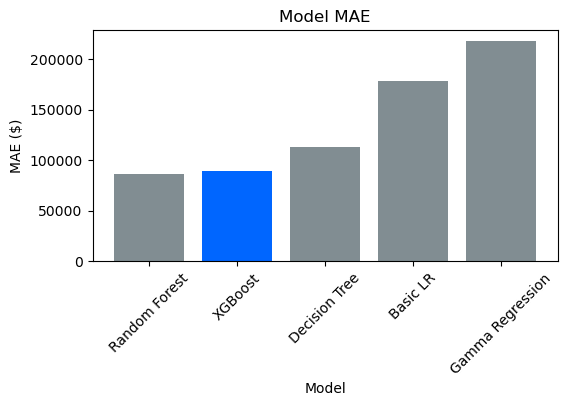

In [68]:
# plot model rmse

plt.figure(figsize=(6,3))
plt.bar(list(model_types.index), model_types['mae'], 
        color = ['#364951A0', '#0066ff', '#364951A0', '#364951A0', '#364951A0'])
plt.title("Model MAE")
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel("MAE ($)")


Text(0, 0.5, 'MAE ($)')

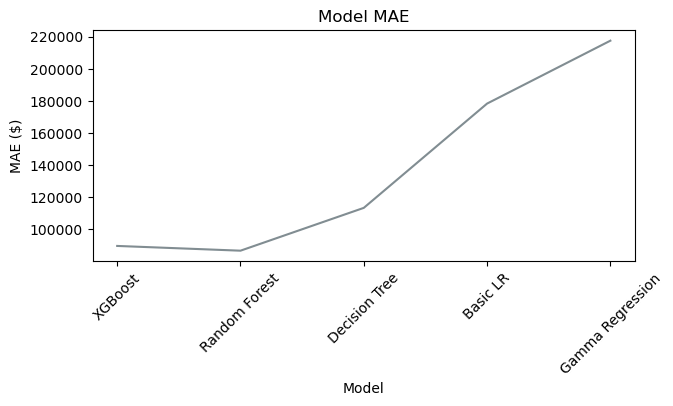

In [86]:
# plot model rmse

plt.figure(figsize=(7,3))
plt.plot(model_types['mae'], color = '#364951A0')
plt.title("Model MAE")
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel("MAE ($)")

Text(0, 0.5, 'R-Square')

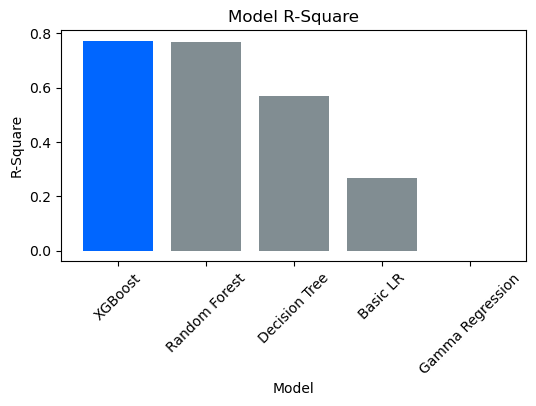

In [73]:
# make data frame from our models dictionary
model_types = pd.DataFrame(models)
 
# sort data frame by r2 and reset index
model_types = model_types.sort_values('R-Square', ascending=False).reset_index()
model_types.drop('index',axis=1, inplace=True)
model_types.set_index('Models', inplace=True)

#model_types

# plot model r-square

plt.figure(figsize=(6,3))
plt.bar(list(model_types.index), model_types['R-Square'], 
        color = ['#0066ff', '#364951A0', '#364951A0', '#364951A0', '#364951A0'])
plt.title("Model R-Square")
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel("R-Square")

Text(0, 0.5, 'R-Square')

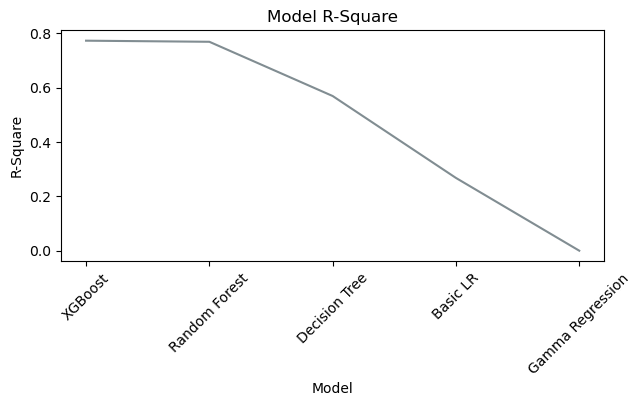

In [87]:
# plot model rmse

plt.figure(figsize=(7,3))
plt.plot(model_types['R-Square'], color = '#364951A0')
plt.title("Model R-Square")
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel("R-Square")

Text(0, 0.5, 'RMSE')

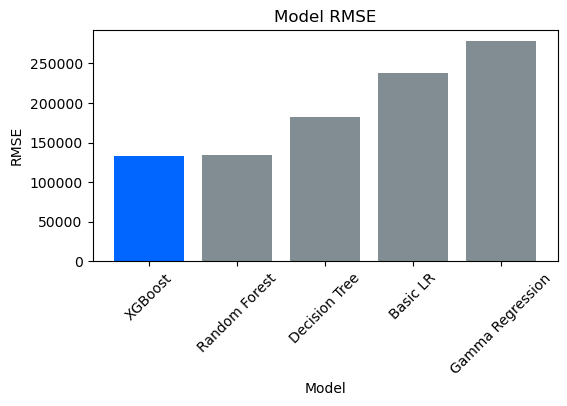

In [75]:
# make data frame from our models dictionary
model_types = pd.DataFrame(models)
 
# sort data frame by rmse and reset index
model_types = model_types.sort_values('rmse', ascending=True).reset_index()
model_types.drop('index',axis=1, inplace=True)
model_types.set_index('Models', inplace=True)


# plot model rmse

plt.figure(figsize=(6,3))
plt.bar(list(model_types.index), model_types['rmse'], 
        color = ['#0066ff', '#364951A0', '#364951A0', '#364951A0', '#364951A0'])
plt.title("Model RMSE")
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

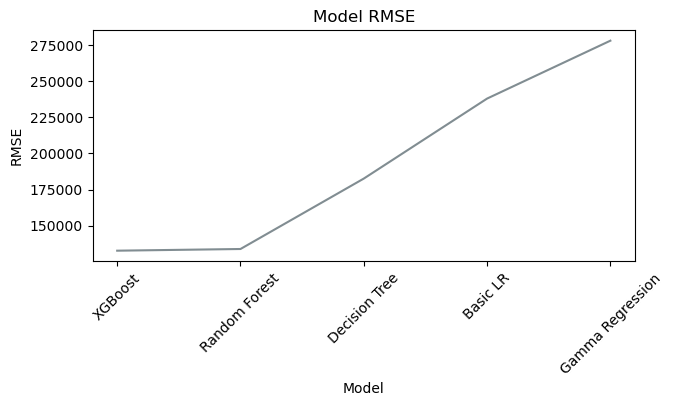

In [88]:
# plot model rmse

plt.figure(figsize=(7,3))
plt.plot(model_types['rmse'], color = '#364951A0')
plt.title("Model RMSE")
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel("RMSE")

Based on the model exploration results, XGBoost performs the best with lowest mean absolute error. Next we will conduct model engineering and hyperparameter tuning to further improve the XGBoost model performance.

#### Model Engineering and Hyperparameter Tuning

In [35]:
# Parameter Tuning max_depth of XGBoost

param_grid = {"max_depth": [4, 5, 6, 7, 8, 10, 12, 15]}

model = XGBRegressor(
    n_estimators=250,
    seed=42,
    missing=0,
    eval_metric='mae')

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5,
                           verbose=10, n_jobs=-4)
grid_search.fit(train_data, y_train)

grid_search.best_estimator_

print("Best parameters set found on train set: \n")
print(grid_search.best_params_)
print("\nGrid scores on train set:\n")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 2/5; 1/8] START max_depth=4.................................................
[CV 4/5; 1/8] START max_depth=4.................................................
[CV 1/5; 1/8] START max_depth=4.................................................
[CV 3/5; 1/8] START max_depth=4.................................................
[CV 5/5; 1/8] START max_depth=4.................................................
[CV 1/5; 2/8] START max_depth=5.................................................
[CV 3/5; 2/8] START max_depth=5.................................................
[CV 2/5; 2/8] START max_depth=5.................................................
[CV 4/5; 2/8] START max_depth=5.................................................
[CV 4/5; 1/8] END ..................max_depth=4;, score=0.764 total time=  21.0s
[CV 5/5; 2/8] START max_depth=5.................................................
[CV 1/5; 1/8] END ..................max_depth=4;,

max_depth = 8 leads to the best model performance

In [36]:
# Parameter Tuning learning_rate of XGBoost

param_grid = {"learning_rate": [.005, .01, .05, .1, .2, .3, .5]}

model = XGBRegressor(
    n_estimators=250,
    max_depth=8,
    seed=42,
    missing=0,
    eval_metric='mae')

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5,
                           verbose=10, n_jobs=-4)
grid_search.fit(train_data, y_train)

grid_search.best_estimator_

print("Best parameters set found on train set: \n")
print(grid_search.best_params_)
print("\nGrid scores on train set:\n")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START learning_rate=0.005.........................................
[CV 3/5; 1/7] START learning_rate=0.005.........................................
[CV 2/5; 1/7] START learning_rate=0.005.........................................
[CV 4/5; 1/7] START learning_rate=0.005.........................................
[CV 5/5; 1/7] START learning_rate=0.005.........................................
[CV 1/5; 2/7] START learning_rate=0.01..........................................
[CV 2/5; 2/7] START learning_rate=0.01..........................................
[CV 3/5; 2/7] START learning_rate=0.01..........................................
[CV 4/5; 2/7] START learning_rate=0.01..........................................
[CV 4/5; 2/7] END ...........learning_rate=0.01;, score=0.666 total time=  41.4s
[CV 5/5; 2/7] START learning_rate=0.01..........................................
[CV 4/5; 1/7] END ..........learning_rate=0.005;,

learning_rate = 0.2 leads to best model performance

In [37]:
# Parameter Tuning max_depth and min_child_weight

param_grid = {"min_child_weight": [3, 4, 5, 6, 7, 8, 9, 10]
              }

model = XGBRegressor(
    n_estimators=250,
    learning_rate=.2,
    max_depth=8,
    seed=42,
    missing=0,
    eval_metric='mae')

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5,
                           verbose=10, n_jobs=-1)
grid_search.fit(train_data, y_train)

grid_search.best_estimator_

print("Best parameters set found on train set: \n")
print(grid_search.best_params_)
print("\nGrid scores on train set:\n")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START min_child_weight=3..........................................
[CV 4/5; 1/8] START min_child_weight=3..........................................
[CV 3/5; 1/8] START min_child_weight=3..........................................
[CV 2/5; 1/8] START min_child_weight=3..........................................
[CV 5/5; 1/8] START min_child_weight=3..........................................
[CV 1/5; 2/8] START min_child_weight=4..........................................
[CV 2/5; 2/8] START min_child_weight=4..........................................
[CV 3/5; 2/8] START min_child_weight=4..........................................
[CV 4/5; 2/8] START min_child_weight=4..........................................
[CV 5/5; 2/8] START min_child_weight=4..........................................
[CV 1/5; 3/8] START min_child_weight=5..........................................[CV 2/5; 3/8] START min_child_weight=5............

The model performance best with min_child_weight = 5

In [89]:
# Final Model
xgb_model = XGBRegressor(
    n_estimators=250,
    learning_rate=.2,
    min_child_weight=5,
    max_depth=8,
    seed=42,
    missing=0,
    eval_metric='mae')

In [90]:
xgb_model.fit(train_data, y_train)
cv_10 = - cross_val_score(xgb_model, train_data, y_train, cv=10,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)  # 10-fold cv
test_predictions = xgb_model.predict(holdout)

In [91]:
# Calculate errors
rmse_cv = (cv_10.mean())**(1/2)
mae = round(mean_absolute_error(y_test, test_predictions), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, test_predictions)), 2)
accuracy = xgb_model.score(holdout, y_test)

print("CV RMSE: ", rmse_cv, "\nMAE: ", mae, "\nRMSE: ", rmse, "\nAccuracy: ", accuracy, "\n{} predictors used for this model".format(train_data.shape[1]))

CV RMSE:  123422.63478073326 
MAE:  80913.01 
RMSE:  122599.45 
Accuracy:  0.8057174654538063 
26 predictors used for this model


### Extract the feature importances from the tuned model

In [92]:
xgb_model.feature_importances_

array([0.05522442, 0.00928132, 0.1475195 , 0.02420442, 0.0265552 ,
       0.00701909, 0.02974443, 0.01330598, 0.01752658, 0.01071947,
       0.01949664, 0.0085019 , 0.0160106 , 0.00465392, 0.        ,
       0.07481998, 0.04615746, 0.00970907, 0.00719677, 0.00356558,
       0.05985866, 0.11694799, 0.25100836, 0.01379772, 0.01668224,
       0.0104926 ], dtype=float32)

In [115]:
values = xgb_model.feature_importances_

feature_names = list(train_data.columns)

In [117]:
df_importance = pd.DataFrame({"variables": feature_names, "importance": values})

In [118]:
df_importance.sort_values(by = 'importance', ascending = False)

,variables,importance
22,homeType_MANUFACTURED,0.251008
2,baths,0.147519
21,homeType_LOT,0.116948
15,sgapt_Foreclosure,0.074820
20,homeType_CONDO,0.059859
0,addressZipcode,0.055224
16,sgapt_New Construction,0.046157
6,hasVideo,0.029744
4,isZillowOwned,0.026555
3,area,0.024204
